## Question 1

In this situation, $H_0$ is that there is no relationship between the money spent on advertisement by TV, radio and newspaper and the sales. Since all p-values are very low (below 0.0001), we can reject $H_0$. Therefore, all three formats indeed have an impact on the sales.

## Question 2

Both KNN classifier and KNN regression method consider the K closest point to the observation for which we have the intention of make a prediction. The main difference is that for the classifier, we give as a prediction the most common label from the K neighbors, whereas for the regression, we calculate a mean.

## Question 3

### a)  

For a fixed value of IQ and GPA, college graduates earn more, on average, than high school graduates. This happens because, even though the interaction of GPA and level is negative, its impact in the starting salary is much lower than the impact of GPA and level alone.

### b)

In [ ]:
b0 = 50
b1 = 20
b2 = 0.07
b3 = 35
b4 = 0.01
b5 = -10

GPA=4.0
IQ=110
level=1
starting_salary = b0+b1*GPA+b2*IQ+b3*level+b4*GPA*IQ+b5*GPA*level
print("The predicted starting salary is: US$", 1000*starting_salary)

The predicted starting salary is: US$ 137100.0


### c)

The fact that $\hat{\beta_3}$ is close to 0 is not enough evidence that the interection of GPA and IQ does not affect the starting salary. For making such a claim, its p-value would have to be analysed. Beyond that, considering that the IQ is, on average, close to a hundred, this interaction increases the impact of the GPA by 5%.

## Question 4

### a)

Both models would have a very low RSS in the training dataset, but we expect the cubic model to have the lowest one, since the quadratic and cubic components would probably wrongly catch some of the irreducible error and treat it as part of the function.

### b)

As for the testing RSS, we expect the cubic model to have the highest, since it overfitted to training dataset.

### c)

Considering a non-linear response, we expect the cubic model to have a better training RSS, since it is more flexible than the linear model. In this situation, it is very likely that the increase in variance is more than compensated by the loss in bias.

### d)

This effect is also expected in the test RSS for a similar reason.

## Question 5

Given that $\hat{y_i}=\sum_{i'=1}^{n}{a_{i'}y_{i'}}$
and that $\hat{y_i}=\hat{\beta} x_i$,
we have:

$\sum_{i'=1}^{n}{a_{i'}y_{i'}}=\hat{\beta} x_i$

$\sum_{i'=1}^{n}{a_{i'}y_{i'}}=\frac{\sum_{i'=1}^{n}{x_{i'}y_{i'}}}{\sum_{j=}^{n}{x_{j}^2}}x_i$

$\sum_{i'=1}^{n}{a_{i'}y_{i'}}=\sum_{i'=1}^{n}\frac{{x_{i'}y_{i'}}}{\sum_{j=}^{n}{x_{j}^2}}x_i$

Since $x_i$ is a constant, we have:

$\sum_{i'=1}^{n}{a_{i'}y_{i'}}=\sum_{i'=1}^{n}\frac{{x_ix_{i'}y_{i'}}}{\sum_{j=}^{n}{x_{j}^2}}$

Therefore, we have:

$a_{i'}=\frac{{x_ix_{i'}}}{\sum_{j=}^{n}{x_{j}^2}}$

## Question 6

Given that $\hat{\beta_1}=\frac{\sum_{i=1}^{n}{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}$, $\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$ and $\hat{y}=\hat{\beta_0}+\hat{\beta_1}\hat{x}$, we can find a value for $\hat{x}$ such that $\hat{y}=\bar{y}$:

$\bar{y}=\hat{\beta_0}+\hat{\beta_1}\hat{x}$

$\bar{y}=\bar{y}-\hat{\beta_1}\bar{x}+\hat{\beta_1}\hat{x}$

$\hat{x}=\bar{x}$

Therefore, the least squares line always passes through the point $(\bar{x}, \bar{y})$.

## Question 7

When $\bar{x}=\bar{y}=0$, we have that $R^2=1-\frac{\sum_{i=1}^{n}{(y_i-\hat{y})^2}}{\sum_{i=1}^{n}(y_i)}$.

We also have that $cor(X,Y) = \frac{\sum_{i=1}^{n}{(x_i})(y_i)}{\sqrt{\sum_{i=1}^{n}{(x_i)^2}}\sqrt{\sum_{i=1}^{n}{(y_i)^2}}}$

## Question 8

### a)

In [ ]:
from enum import auto
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

auto_path = "/content/drive/MyDrive/Data Science/data/Auto.csv"
df_auto = pd.read_csv(auto_path)
df_auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
df_auto.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


In [ ]:
df_auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df_auto = df_auto.query('horsepower!="?"')
df_auto['horsepower'] = df_auto['horsepower'].astype(int)
y = df_auto['mpg']
X = df_auto['horsepower']
model = sm.ols('mpg ~ horsepower', data=df_auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        19:08:15   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

Since the p-value associated with the horsepower feature is almost zero, we can conclude that there is a strong relationship between the predictor and the response. Another way to see this is looking at the coefficient, which is -0.1578, and the confidence interval, which is from -0.171 to -0.145. If there was no relation between the predictor and the response, the coefficient would be very close to zero.

On the other hand, this relation does not seem to be very strong, since the coefficient is below one in module. In fact, for every unit change in the predictor, we expect to see a change of -0.1578 in the response. Since the coefficient is negative, we can conclude that the relation is also negative.

In [ ]:
x = 98
print("When the horsepower is 98, we expect a mpg of:", round(results.predict(dict(horsepower=x)).iloc[0], 2))

When the horsepower is 98, we expect a mpg of: 24.47


### b)

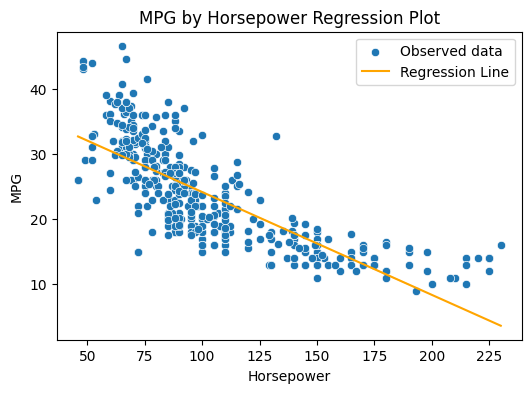

In [ ]:
y_pred = results.predict()
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x='horsepower', y='mpg', data=df_auto, ax=ax, label='Observed data')
sns.lineplot(x='horsepower', y=y_pred, data=df_auto, ax=ax, color='orange', label='Regression Line')
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.legend()
ax.set_title("MPG by Horsepower Regression Plot")
plt.show()

### c)

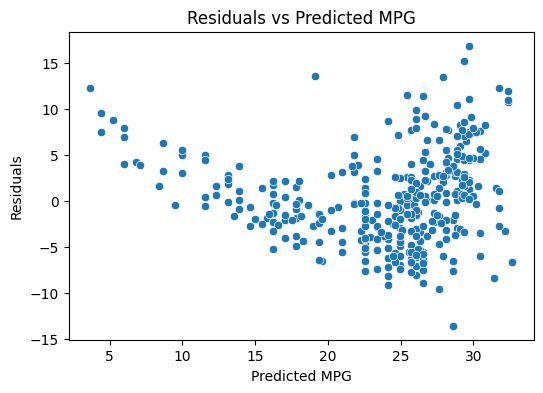

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=results.resid, data=df_auto, ax=ax)
ax.set_xlabel("Predicted MPG")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Predicted MPG")
plt.show()


The U-shape curve indicates that the relationship between the predictor and the response may not be linear. A transformation would be necessary to improve the model. Ideally, we would see not pattern in the residuals plot.

## Question 9

### a)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt

auto_path = "/content/drive/MyDrive/Data Science/data/Auto.csv"
df_auto = pd.read_csv(auto_path)
df_auto.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
df_auto = df_auto.query('horsepower!="?"')
df_auto['horsepower'] = df_auto['horsepower'].astype(int)
df_auto = df_auto.iloc[:, 0:-1].copy()
df_auto.tail()

/tmp/ipython-input-23-3543353600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_auto['horsepower'] = df_auto['horsepower'].astype(int)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
392,27.0,4,140.0,86,2790,15.6,82,1
393,44.0,4,97.0,52,2130,24.6,82,2
394,32.0,4,135.0,84,2295,11.6,82,1
395,28.0,4,120.0,79,2625,18.6,82,1
396,31.0,4,119.0,82,2720,19.4,82,1


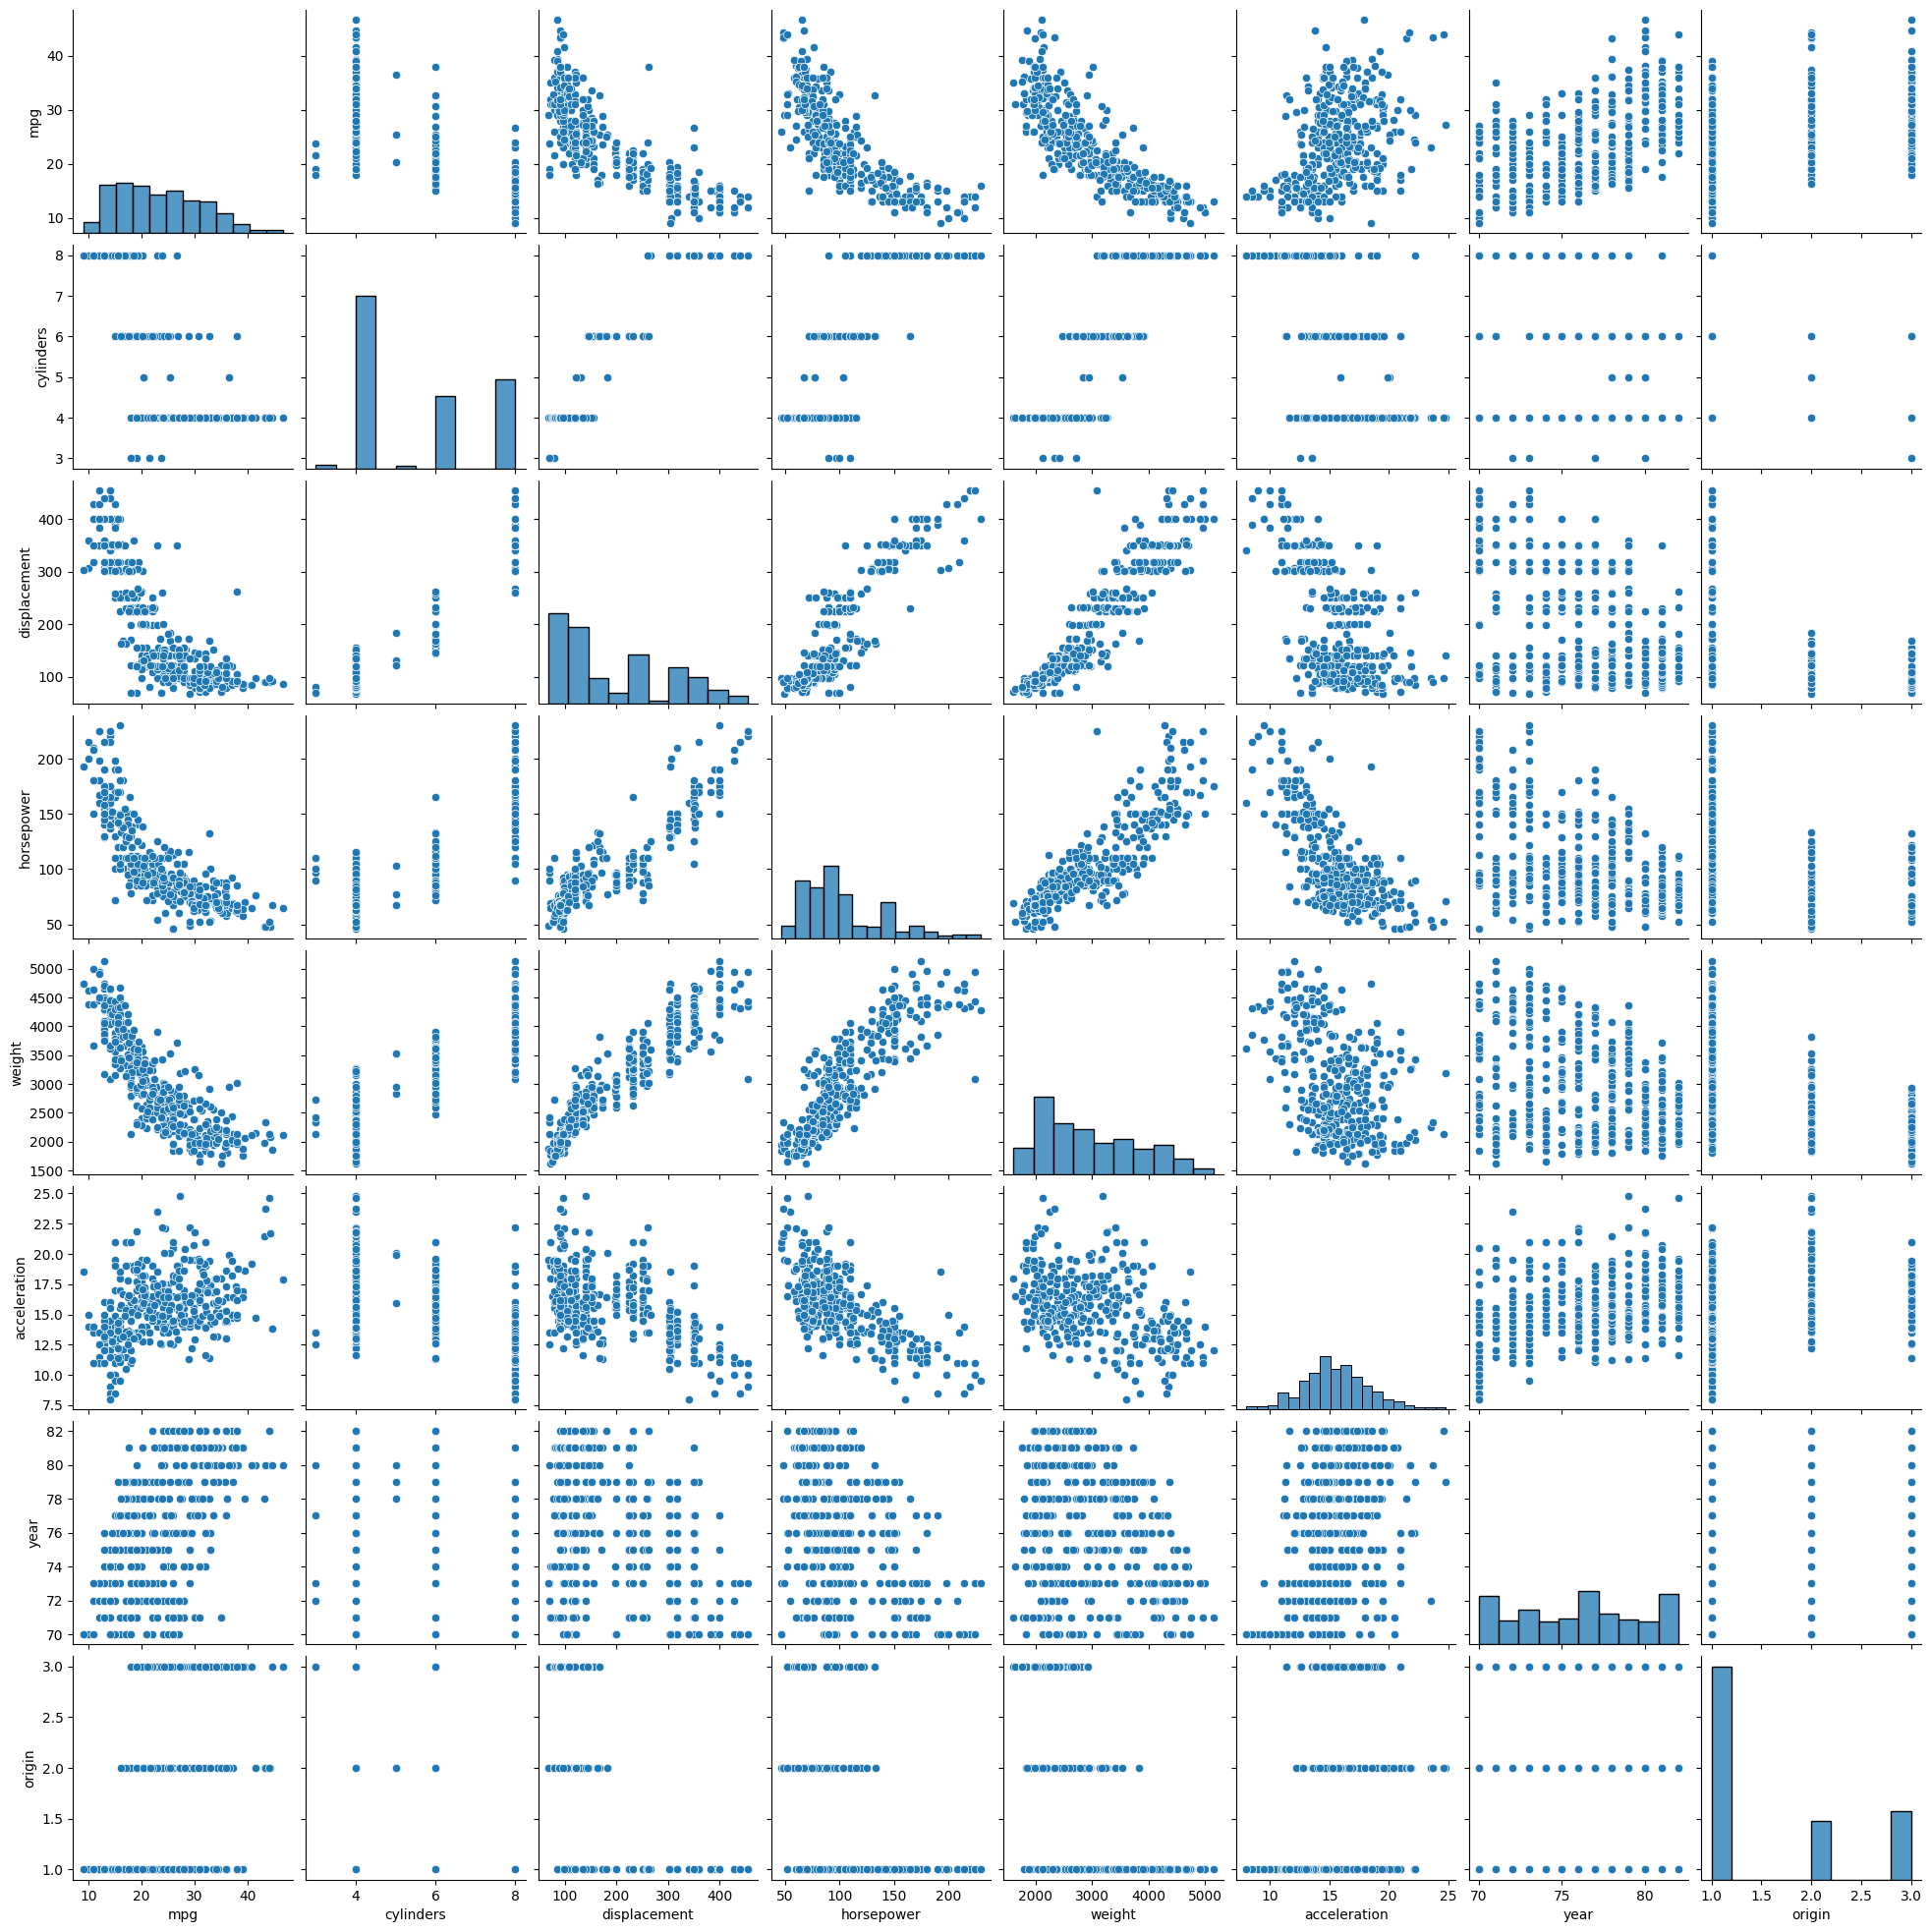

In [ ]:
sns.pairplot(df_auto)
plt.show()

### b)

In [ ]:
df_auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### c)

In [ ]:
predictors = '+'.join(df_auto.columns.difference(['mpg']))
formula = 'mpg ~ ' + predictors
model = sm.ols(formula, data=df_auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          2.04e-139
Time:                        22:54:47   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [ ]:
anova_lm(results)

,df,sum_sq,mean_sq,F,PR(>F)
acceleration,1.0,4268.531557,4268.531557,385.473705,6.322170e-60
cylinders,1.0,10165.022825,10165.022825,917.961823,7.475500e-104
displacement,1.0,1048.549593,1048.549593,94.690244,3.784717e-20
horsepower,1.0,646.764827,646.764827,58.406698,1.721447e-13
origin,1.0,401.919821,401.919821,36.295743,3.973689e-09
weight,1.0,633.742409,633.742409,57.230697,2.894271e-13
year,1.0,2402.249906,2402.249906,216.937408,3.055983e-39
Residual,384.0,4252.212530,11.073470,NaN,NaN


Since all predictors have a very high F statistic, and consequently a very low p-value, we can conclude that they are all related to the response, with the acceleration variable being by far the most significant one, followed by the cylinders variable.

Since the year coefficient is above zero, we can conclude that it has a positive relation with the mpg response. Therefore, it seems that newer cars have a higher mpg.

### d)

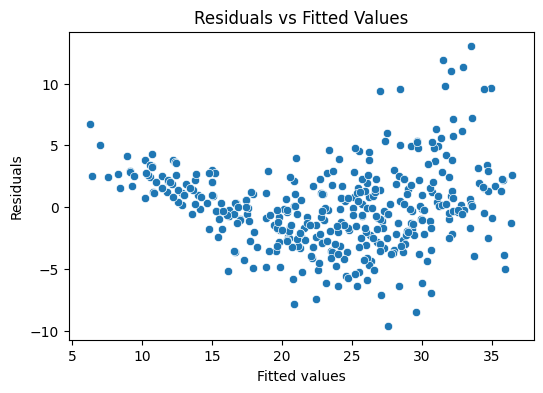

In [ ]:
y_pred = results.predict()
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=results.resid, ax=ax)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted Values")
plt.show()

We still have a U-shape curve, but it is no longer much evident. On the other hand, the error seems to increase with the response, which would indicate a heteroscedasticity.

### e)

In [ ]:
formula = 'mpg ~ acceleration + cylinders + year*horsepower'
model = sm.ols(formula, data=df_auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     306.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          5.14e-132
Time:                        23:40:53   Log-Likelihood:                -1046.8
No. Observations:                 392   AIC:                             2106.
Df Residuals:                     386   BIC:                             2129.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -99.7568     11.308     

In [ ]:
anova_lm(results)

,df,sum_sq,mean_sq,F,PR(>F)
acceleration,1.0,4268.531557,4268.531557,344.023234,2.279621e-55
cylinders,1.0,10165.022825,10165.022825,819.252237,1.798770e-97
year,1.0,2602.064504,2602.064504,209.713958,2.897964e-38
horsepower,1.0,854.482595,854.482595,68.867212,1.785887e-15
year:horsepower,1.0,1139.525984,1139.525984,91.840346,1.179430e-19
Residual,386.0,4789.366003,12.407684,NaN,NaN


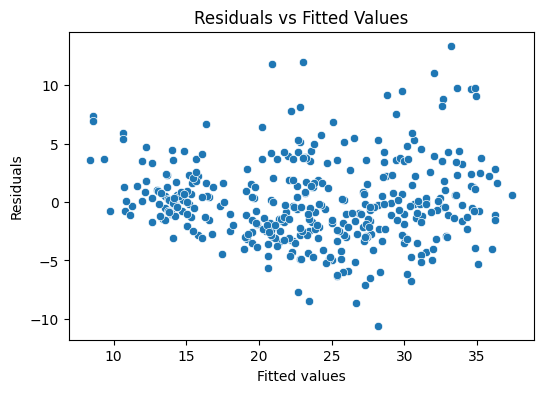

In [ ]:
y_pred = results.predict()
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=results.resid, ax=ax)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted Values")
plt.show()

The model with fewer predictors and an interaction between the year and horsepower variables seems to be better. There is no clear pattern in the residuals plot. The interaction has a lower p-value than the one of the horsepower alone.

### f)

In [ ]:
formula = 'mpg ~ np.pow(horsepower, 1)'
model = sm.ols(formula, data=df_auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           7.03e-81
Time:                        23:49:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                39.93

In [ ]:
formula = 'mpg ~ np.log(horsepower)'
model = sm.ols(formula, data=df_auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     785.9
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.70e-95
Time:                        23:49:56   Log-Likelihood:                -1144.9
No. Observations:                 392   AIC:                             2294.
Df Residuals:                     390   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            108.6997      3

In [ ]:
formula = 'mpg ~ np.sqrt(horsepower)'
model = sm.ols(formula, data=df_auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     954.9
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          6.94e-107
Time:                        23:51:16   Log-Likelihood:                -1118.6
No. Observations:                 392   AIC:                             2241.
Df Residuals:                     390   BIC:                             2249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             116.5501    

In [ ]:
formula = 'mpg ~ np.pow(horsepower, 2)'
model = sm.ols(formula, data=df_auto)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          6.02e-102
Time:                        23:51:51   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                46.21

The relation between the mpg and horsepower does not seem to be linear. Therefore, the transformations get better results, with the sqrt model having the highest $R^2$ and $F$ statistic.

## Question 10

### a)

In [87]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import seaborn as sns
import matplotlib.pyplot as plt

carseats_path = "/content/drive/MyDrive/Data Science/data/Carseats.csv"
df_carseats = pd.read_csv(carseats_path)
df_carseats.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [88]:
formula = "Sales ~ Price + Urban + US"
model = sm.ols(formula, data=df_carseats)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           2.39e-23
Time:                        00:09:27   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036   

### b)

The Price and US predictors have a very low p-value. Therefore, we can conclude that they are related to the Sales response. The same cannot be said about the Urban feature, which has a very high p-value and may not be related with the response. Both US and Urban variables are qualitative. The value "Yes" is interpreted as the value 1 in the model, whereas the value "No" is interpreted as zero. A change of one unit in the Price varies the response by -0.0545. When US and Urban variables are equal to "No", nothing happens to the intercept. When US is "Yes", the intercept is add by 1.2, whereas a value of "Yes" to the Urban variable subtracts 0.0219 from the intercept. Overall, this model can be represented by 4 lines with the same slope, which is given by the Price variable. Each combination of the qualitative variables gives a different intercept, and consequently, a different line.  

### c)

$US=\begin{cases} 1\quad Yes, \\ 0 \quad No\end{cases}$

$Urban=\begin{cases} 1\quad Yes, \\ 0\quad No \end{cases}$

$Sales = 13.0435-0.0545Price+1.2006US-0.0219Urban$

### d)

We can reject $H_0$ for the Price and US variables.

### e)

In [89]:
formula = "Sales ~ Price + US"
model = sm.ols(formula, data=df_carseats)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           2.66e-24
Time:                        00:24:25   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

### f)

Even though the model with only significant predictors are slightly better, they both perform very poorly.

### g)

The Price coefficient goes from -0.065 to -0.044, when we consider a 95% confidence interval. For the US variable, we have a interval of  0.692 to 1.708.

### h)

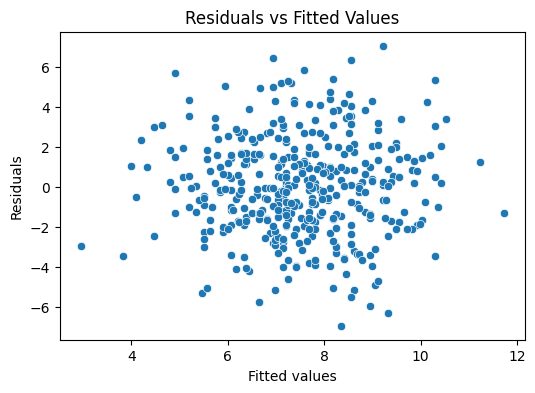

In [90]:
fig, ax= plt.subplots(figsize=(6, 4))
y_pred = results.predict()
sns.scatterplot(x=y_pred, y=results.resid, ax=ax)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted Values")
plt.show()

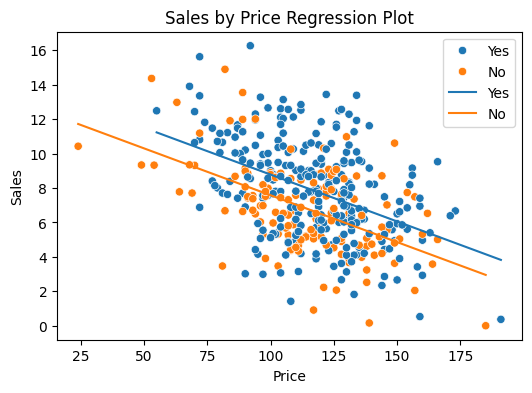

In [95]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x='Price', y='Sales', hue='US',data=df_carseats, ax=ax)
sns.lineplot(x='Price', y=y_pred, hue='US',data=df_carseats, ax=ax)
ax.set_xlabel("Price")
ax.set_ylabel("Sales")
ax.legend()
ax.set_title("Sales by Price Regression Plot")
plt.show()


The data does not appear to have strong outliers or high leverage points. The points are very scattered and the relation between the predictors and the response does not seem to be very strong.

## Question 11